In [1]:
from pathlib import Path
import sys
sys.path.append('../')
from pma_open import *
from matplotlib.widgets import Cursor, Button

#My image
file_path = '../Dropbox Files/hel1.pma'
image_path = "hel1_Avg_Frame/hel1_Avg_Frame.png"
image = io.imread(image_path, as_gray=True)

#Image on dropbox
hel1_ave_path = '../Dropbox Files/hel1_ave_LF_Circ.tif'
hel1_ave_image = io.imread(hel1_ave_path)

#Testing avg_frame_arr function
avg_frame_data = avg_frame_arr(file_path)

#Chanel arrays
avg_frame_data_CH1 = avg_frame_data[:,:256]
avg_frame_data_CH2 = avg_frame_data[:,256:]

#Chanel image paths
CH1_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH1.png"
CH2_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_CH2.png"

#Chanel images
image_CH1 = io.imread(CH1_img_path, as_gray=True)
image_CH2 = io.imread(CH2_img_path, as_gray=True)

Image Size: 512 x 512
Sucessfully generated average frame


Number of peaks identified in CH1: 57
Number of peaks identified in CH2: 68


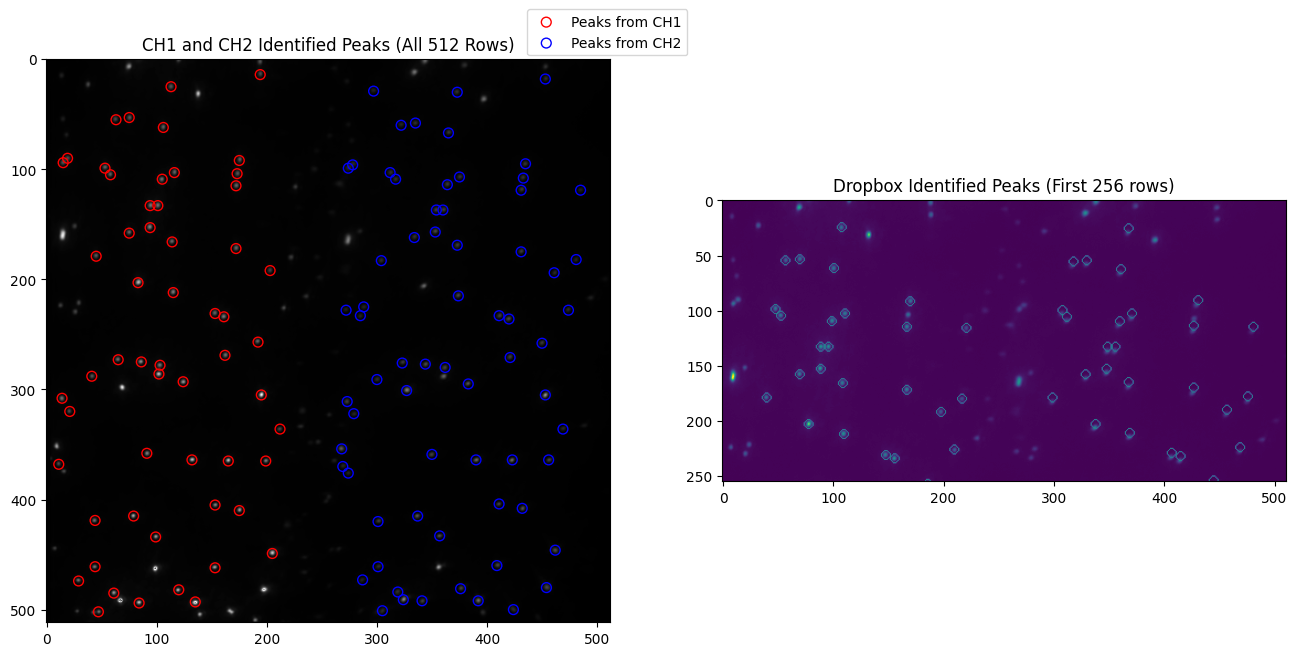

In [2]:
peaks_coords_IDL_CH1 = find_peaks_scipy_IDL(CH1_img_path)[0]
peaks_coords_IDL_CH2_new = find_peaks_scipy_IDL(CH2_img_path, sigma=2, block_size=16, scaler_percent=10)[0]

good_peaks_1,_ = good_peak_finder_CH1(CH1_img_path)
good_peaks_2_new,_ = good_peak_finder_CH2(CH2_img_path, sigma=2, block_size=16, scaler_percent=10, boarder=10, max_rad=3)

# Move good_peaks_1 to CH2 to display full image
good_peaks_1_CH2 = shift_peaks_CH(good_peaks_1)
good_peaks_2_CH2 = shift_peaks_CH(good_peaks_2_new)

#All in one image!
print(f"Number of peaks identified in CH1: {len(good_peaks_1)}")
print(f"Number of peaks identified in CH2: {len(good_peaks_2_CH2)}")

f, axes = plt.subplots(1, 2, figsize=(16, 24))
axes[0].set_title("CH1 and CH2 Identified Peaks (All 512 Rows)")
axes[0].imshow(image, cmap="gray")
scat1= axes[0].scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
scat2= axes[0].scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
axes[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1.1))

axes[1].set_title("Dropbox Identified Peaks (First 256 rows)")
axes[1].imshow(hel1_ave_image)
plt.show()

# Mapping Function
#### Example Pairs
CH1_Peak50 (x,y):(194,14)
CH2_Peak50 (x,y):(453,18)
CH1_Peak44 (x,y):(45,179)
CH2_Peak47 (x,y):(304,183)
CH1_Peak27 (x,y):(44,419)
CH2_Peak32 (x,y):(301,420)

In [3]:
print(f"First 10 good_peaks_new: {good_peaks_2_new[:10]}")
print(f"First 10 good_peaks_2_CH2: {good_peaks_2_CH2[:10]}")
#This shows us that in the good_peaks_2 array the peaks have the same index!

First 10 good_peaks_new: [[305 197]
 [491  68]
 [301  71]
 [492 136]
 [364 134]
 [364 167]
 [354  12]
 [415  81]
 [295 127]
 [408 176]]
First 10 good_peaks_2_CH2: [[305 453]
 [491 324]
 [301 327]
 [492 392]
 [364 390]
 [364 423]
 [354 268]
 [415 337]
 [295 383]
 [408 432]]


In [4]:
# print(f" good_peaks_2: {good_peaks_2_CH2[28:32]}")

 good_peaks_2: [[233 411]
 [258 450]
 [311 273]
 [169 373]]


In [5]:
# print(f"First 5 peaks in CH1: {good_peaks_1[:5]}")
# print(f"Last 3 peaks in CH2:{good_peaks_2_new[-3:]}")

First 5 peaks in CH1: [[493 135]
 [305 195]
 [494  84]
 [449 205]
 [286 102]]
Last 3 peaks in CH2:[[182 225]
 [119 229]
 [228  16]]


In [6]:
list_1 = []
print(type(list_1))

<class 'list'>


In [132]:
def find_linear_pairs(peaks_1, peaks_2):
    # peaks_2 coordinates goes from [0, 512] to [256,512]
    gp1_list = [tuple(peak) for peak in peaks_1]
    gp2_list = [tuple(peak) for peak in peaks_2]
    gp2_set = set(gp2_list)
    linear_pair_count = 0
    linear_pair_arr_CH1 = []
    linear_pair_arr_CH2 = []

    for coord in gp1_list:
        if coord in gp2_set:
            linear_pair_count += 1
            linear_pair_arr_CH1.append(coord)
            linear_pair_arr_CH2.append(c)
        else:
            for c in gp2_set:
                if (abs(coord[0] - c[0])) <=1 and (255 <= abs(coord[1] - c[1]) <= 257):
                    linear_pair_count += 1
                    linear_pair_arr_CH1.append(coord)
                    linear_pair_arr_CH2.append(c)
                    break
    linear_pair_arr_CH1 = np.array(linear_pair_arr_CH1)
    linear_pair_arr_CH2 = np.array(linear_pair_arr_CH2)
    return linear_pair_count, linear_pair_arr_CH1, linear_pair_arr_CH2

In [133]:
linear_pair_count = find_linear_pairs(good_peaks_1, good_peaks_2_CH2)[0]
linear_pair_arr_CH1 = find_linear_pairs(good_peaks_1, good_peaks_2_CH2)[1]
linear_pair_arr_CH2 = find_linear_pairs(good_peaks_1, good_peaks_2_CH2)[2]

print(f"Number of linear pairs: {linear_pair_count}")
print(f"Linear pair CH1 coords:\n {linear_pair_arr_CH1}")

Number of linear pairs: 6
Linear pair CH1 coords:
 [[493 135]
 [482 120]
 [365 199]
 [461  44]
 [419  44]
 [336 212]]


In [134]:
print(f"Linear pair CH2 coords:\n {linear_pair_arr_CH2}")

Linear pair CH2 coords:
 [[492 392]
 [481 376]
 [364 456]
 [461 301]
 [420 301]
 [336 469]]


In [120]:
def show_linear_pairs(image, good_peaks_1, good_peaks_2, linear_pair_CH1, linear_pair_CH2):
    linear_pair_CH2 = shift_peaks_CH(linear_pair_CH2)
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray")
    plt.title("CH1 and CH2 Peaks with Linear Pairs in Yellow")
    plt.scatter(good_peaks_1[:, 1], good_peaks_1[:, 0], s=50, facecolors='none', edgecolors='r', label='Peaks from CH1')
    plt.scatter(good_peaks_2_CH2[:, 1], good_peaks_2_CH2[:, 0], s=50, facecolors='none', edgecolors='b', label='Peaks from CH2')
    plt.scatter(linear_pair_CH1[:, 1], linear_pair_CH1[:, 0], s=50, facecolors='none', edgecolors='g', label='Linear Pairs')
    plt.scatter(linear_pair_CH2[:, 1], linear_pair_CH2[:, 0], s=50, facecolors='none', edgecolors='g')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15))
    plt.show()

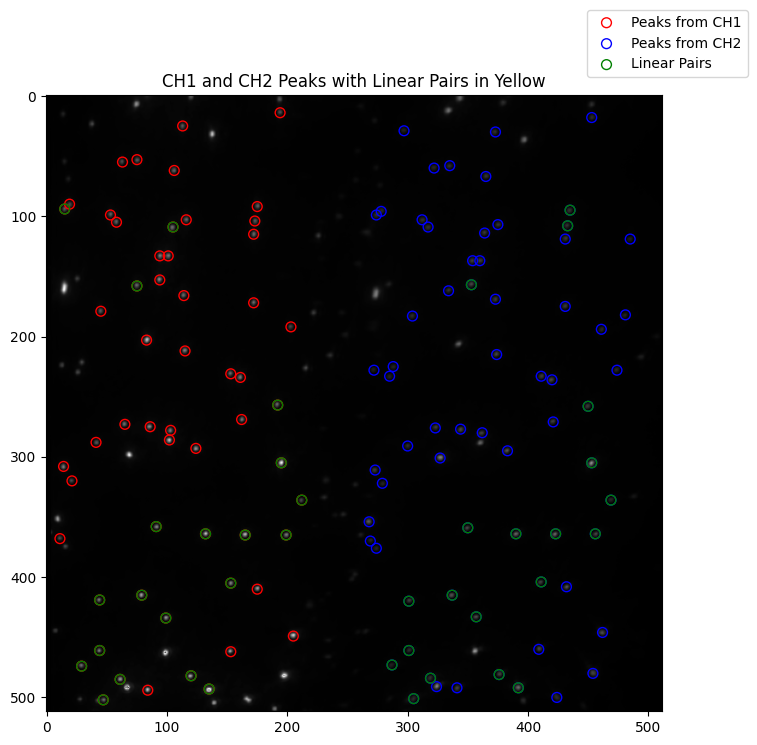

In [121]:
show_linear_pairs(image, good_peaks_1, good_peaks_2_new, linear_pair_arr_CH1, linear_pair_arr_CH2)

In [ ]:
# I could either do it as an array of CH1 peak idx and CH2 peak idx (e.g. array1 = [50, 44 ,27] and array2=[50, 47, 32] where array[0] maps to array2[0])
# Or I could do it as an array of coordinates e.g. map_array = [(194,14), (453,18), (45,179), (304,183), (44, 419), (301, 420)]
# where map_array[0] maps to map_array[1] and map_array[2] maps to map_array[3] etc...

# Intuitively, the first option seems to make the most sense to a user

array1 = np.array([50, 44 ,27])
array2 = np.array([50, 47, 32])



In [ ]:
# np.polynomial.polynomial.Polynomial.mapparms()


In [ ]:
# # Average frame, CH1 and CH2 overlayed
# avg_overlayed = ((avg_frame_data_CH1 + avg_frame_data_CH2) / 2).astype(np.uint8)
# Overlay_img_path = "hel1_Avg_Frame/hel1_Avg_Frame_Overlay.png"
# overlay_img = io.imread(Overlay_img_path)

# #Dropbox path
# average_path_DB = "../Dropbox Files/hel1_ave_merged.tif"
# average_DB_image = io.imread(average_path_DB)

# f, axes = plt.subplots(1, 2, figsize=(16, 24))

# axes[0].imshow(overlay_img, cmap="gray")
# axes[1].imshow(average_DB_image, cmap="gray")
# plt.show();


In [ ]:
# #Dropbox path to Top half of merged image circled!
# average_circ_path_DB = "../Dropbox Files/hel1_ave_Merg_Circ.tif"
# average_circ_DB_image = io.imread(average_circ_path_DB)
# plt.imshow(average_circ_DB_image)
# plt.show();